IMPORT DEPENDENCIES

In [1]:
#
import numpy as np
import pandas as pd

#
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#
import matplotlib.pyplot as plt
%matplotlib inline

DATA COLLECTION AND PRE-PROCESSING

In [2]:
#loading data from CSV file to a pandas dataframe

def chooseDataSet(choice: int) -> int:
    return pd.read_csv('./tmdb_movies.csv') if choice >= 1 else pd.read_csv('./movies.csv')

# change arg value below to 1 for a larger dataset
movies_data = chooseDataSet(0)

In [4]:
#print first 5 rows of dataframe

movies_data.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [5]:
# get nubers of rows and columns in the dataframe

movies_data.shape

(4803, 24)

In [6]:
# get list of columns in the dataframe

movies_data.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [11]:
# select the relevant features for the recommendation
selected_features = ['genres', 'keywords', 'original_title', 'original_language', 'cast', 'director', 'tagline', 'overview']

In [12]:
# replacing the null values with the null string in relevant columns from {selected_features} list

for feature in selected_features:
    if feature in movies_data.columns:
        movies_data[feature] = movies_data[feature].fillna('')

In [13]:
# combining all {selected_features} relevant columns into a combined feature

combined_features = ''
for feature in selected_features:
    if feature in movies_data.columns:
        combined_features += movies_data[feature]
        
        if not feature == selected_features[-1]:
            combined_features += ' '

print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  Newlyweds en Edward Burns Kerr...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      Shanghai Calling en Daniel Henney Eliza Coup...
4802    Documentary obsession camcorder crush dream gi...
Name: genres, Length: 4803, dtype: object


In [17]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)

print(feature_vectors)

  (0, 5421)	0.16241224926400233
  (0, 1042)	0.1203780886520913
  (0, 1279)	0.05168931899774521
  (0, 22185)	0.16382161054066796
  (0, 1319)	0.03126935537667198
  (0, 20250)	0.15861133905105337
  (0, 10686)	0.1362542130197356
  (0, 3076)	0.09803533575416556
  (0, 28371)	0.1427233574532523
  (0, 2778)	0.09638118166726353
  (0, 4262)	0.06089328596415378
  (0, 18563)	0.10733832097641263
  (0, 29483)	0.15241465163984802
  (0, 20138)	0.04790816872412218
  (0, 18800)	0.1427233574532523
  (0, 28255)	0.030392536461058335
  (0, 8066)	0.17690536950301278
  (0, 14458)	0.040930343316435844
  (0, 17535)	0.14037328390039988
  (0, 20723)	0.18950085291303687
  (0, 4922)	0.1227281622049437
  (0, 241)	0.19399637552789303
  (0, 13890)	0.0356657511066179
  (0, 20654)	0.36481488902462184
  (0, 20002)	0.030850131162016833
  :	:
  (0, 14618)	0.08282586921176499
  (0, 23842)	0.14746669230112583
  (0, 18313)	0.12088131243744694
  (0, 16044)	0.16860893667520768
  (0, 26664)	0.11404342041278993
  (0, 30544)	0.148

COSINE SIMILARITY SCORE

In [25]:
# getting the similarity scores using Cosine similarity

similarity = cosine_similarity(feature_vectors)

In [26]:
print('SIMILARITY')
print(similarity)
print()
print('SHAPE')
print(similarity.shape)

SIMILARITY
[[1.         0.05462703 0.03144384 ... 0.02483116 0.02857211 0.00708768]
 [0.05462703 1.         0.04154242 ... 0.05403246 0.03712447 0.015927  ]
 [0.03144384 0.04154242 1.         ... 0.02312761 0.04297385 0.01267203]
 ...
 [0.02483116 0.05403246 0.02312761 ... 1.         0.03021007 0.0395016 ]
 [0.02857211 0.03712447 0.04297385 ... 0.03021007 1.         0.0290878 ]
 [0.00708768 0.015927   0.01267203 ... 0.0395016  0.0290878  1.        ]]

SHAPE
(4803, 4803)


DATA VISUALIZATION - not working

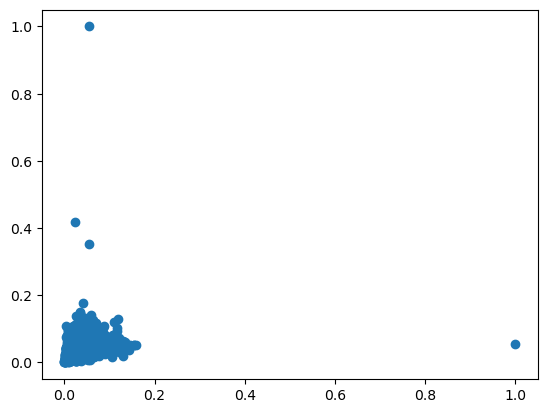

In [29]:
# #
# ypoints = np.array(feature_vectors)
# ypoints = list(feature_vectors)

# plt.plot(ypoints, marker = '*')
plt.scatter(similarity[0], similarity[1])
plt.show()

CUSTOM FUNCTIONS

In [33]:
# getting the movie name from the user
def getMovieName(name = 'iron man'):
    return input('Enter your favourite movie name: ') if name == '' else name
    
# create a list with all the movie names fgiven in the dataset
# list_of_all_titles
def getMovieList(data):
    return data['title'].tolist()

# get similar movies
def getSimilarMovies(movie_name, list_of_all_titles):
    return difflib.get_close_matches(movie_name, list_of_all_titles)

...

In [34]:
movie_list = getMovieList(movies_data)

In [36]:
#

movie_name = getMovieName()

similar_movies = getSimilarMovies(movie_name, movie_list)
print(similar_movies)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [37]:
#

find_movie_index = movies_data[movies_data.title == similar_movies[0]]['index'].values[0]
print(find_movie_index)

68


In [40]:
# find similar movies to movies with index value

similarity_score = list(enumerate(similarity[find_movie_index]))
len(similarity_score)
# print(similarity_score)

4803

In [44]:
# sorting movies by {similarity_score} in order of highest to lowest similarity

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse=True)
# print(sorted_similar_movies)

In [45]:
# print 10 movies similar to the selected movie, based on the index values
# skip first movie, as it is the same as {movie_name ~ similar_movies[0]}

print('Movies Suggestions Similar to: {}\n'.format(similar_movies[0]))

max_similar = 10
for movie in sorted_similar_movies[1:max_similar + 1]:
    print(movies_data[movies_data.index == movie[0]]['title'].values[0])

Movies Suggestions Similar to: Iron Man

Iron Man 2
Iron Man 3
Avengers: Age of Ultron
Captain America: Civil War
The Avengers
X-Men
Ant-Man
X-Men: Apocalypse
Made
Guardians of the Galaxy
